In [2]:
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
path = 'E:/Dataset/新闻推荐比赛数据/'
# path = 'C:/ZhangLI/Codes/DataSet/新闻推荐比赛数据/'
train = path + 'articles.csv'
train_click = path + 'train_click_log.csv'

In [7]:
# 分析用户本身的基本属性，文章用户和文章交互的一些分布，召回策略，特征工程
#####train
trn_click = pd.read_csv(path+'train_click_log.csv')
#trn_click = pd.read_csv(path+'train_click_log.csv', names=['user_id','item_id','click_time','click_environment','click_deviceGroup','click_os','click_country','click_region','click_referrer_type'])
item_df = pd.read_csv(path+'articles.csv')
item_df = item_df.rename(columns={'article_id': 'click_article_id'})  #重命名，方便后续match
# item_emb_df = pd.read_csv(path+'articles_emb.csv')

In [8]:
# data preprocess
trn_click['rank'] = trn_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)
trn_click['click_cnts'] = trn_click.groupby(['user_id'])['click_timestamp'].transform('count')

In [9]:
# 数据合并
trn_click = trn_click.merge(item_df, how='left', on=['click_article_id'])
trn_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,199999,160417,1507029570190,4,1,17,1,13,1,11,11,281,1506942089000,173
1,199999,5408,1507029571478,4,1,17,1,13,1,10,11,4,1506994257000,118
2,199999,50823,1507029601478,4,1,17,1,13,1,9,11,99,1507013614000,213
3,199998,157770,1507029532200,4,1,17,1,25,5,40,40,281,1506983935000,201
4,199998,96613,1507029671831,4,1,17,1,25,5,39,40,209,1506938444000,185


user_id: 用户的唯一标识  
click_article_id: 用户点击的文章唯一标识  
click_timestamp: 用户点击文章时的时间戳  
click_environment: 用户点击文章的环境  
click_deviceGroup: 用户点击文章的设备组  
click_os: 用户点击文章时的操作系统  
click_country: 用户点击文章时的所在的国家  
click_region: 用户点击文章时所在的区域  
click_referrer_type: 用户点击文章时，文章的来源  

In [10]:
trn_click.user_id.nunique()  # nunique return value;  unique return arry

200000

In [11]:
trn_click.groupby(['user_id'])['click_article_id'].count().min()

2

In [20]:
# 数据分析
user_click_merge = trn_click.copy()
# 用户重复点击
repeat_cnt = user_click_merge.groupby(['user_id', 'click_article_id'])['click_timestamp'].agg({'count'}).reset_index()
repeat_cnt.sort_values(by='count', ascending=False)
repeat_cnt['count'].unique()

array([ 1,  2,  4,  3,  6,  5, 10,  7, 13], dtype=int64)

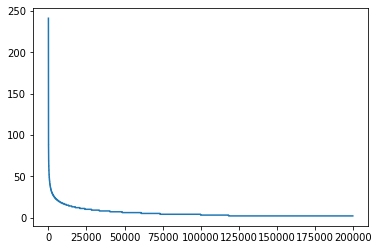

In [24]:
# 用户点击环境变化分析
# 绝大多数的用户的点击环境还是比较固定的。思路：可以基于这些环境的统计特征来代表用户本身的属性
# 用户点击新闻数量的分布
user_click_item_count = sorted(user_click_merge.groupby('user_id')['click_article_id'].count(), reverse=True)
plt.plot(user_click_item_count)
# 点击次数排前50的用户的点击次数都在100次以上，可以判定为活跃用户，and 非活跃用户


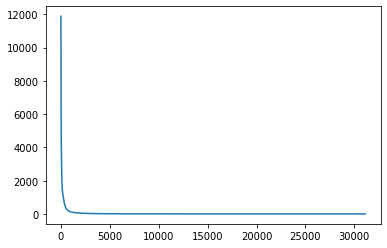

In [27]:
# 新闻点击次数分析
user_click_count = sorted(user_click_merge.groupby('click_article_id')['user_id'].count(), reverse=True)
plt.plot(user_click_count)
# 定义热门文章


In [35]:
# 两篇新闻连续出现的次数 对于timestamp连续出现，还是同一个用户连续看两次？？？？？
temp = user_click_merge.sort_values('click_timestamp')
#temp.groupby(['user_id'])['click_article_id'].transform(lambda x: x.shift(-1))
f = 0
for key, value in temp.groupby(['user_id'])['click_article_id']:
    f += 1
    print(value)
    if f == 5:
        break
        

        
# 查看连续出现的一个文章 类型

1112619     30760
1112620    157507
Name: click_article_id, dtype: int64
1112601    289197
1112602     63746
Name: click_article_id, dtype: int64
1112599     36162
1112600    168401
Name: click_article_id, dtype: int64
1112597    50644
1112598    36162
Name: click_article_id, dtype: int64
1112586    42567
1112587    39894
Name: click_article_id, dtype: int64


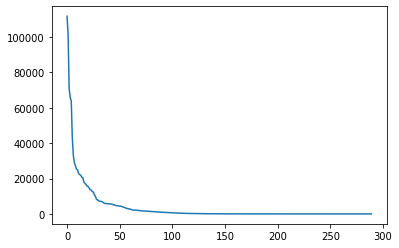

In [36]:
# 新闻文章信息
plt.plot(user_click_merge['category_id'].value_counts().values)

In [37]:
!pip install gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'd:\installsoftware\python365\python.exe -m pip install --upgrade pip' command.
